#✈️ Customer Satisfaction Prediction

## Data Acquisition and Understanding

### Importing the packages and exploring the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_roc_curve, roc_curve, roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler

from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
sns.despine()
sns.set(style='white')
sns.set_palette('rocket_r')

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df =  pd.read_csv('/content/drive/MyDrive/Invistico_Airline.csv')
display(df.head())
print('Shape:',df.shape)

Mounted at /content/drive


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Shape: (129880, 23)


In [ ]:
def check(df): #to check on the data
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

check(df)

,column,dtypes,nunique,sum_null
0,satisfaction,object,2,0
1,Gender,object,2,0
2,Customer Type,object,2,0
3,Age,int64,75,0
4,Type of Travel,object,2,0
5,Class,object,3,0
6,Flight Distance,int64,5398,0
7,Seat comfort,int64,6,0
8,Departure/Arrival time convenient,int64,6,0
9,Food and drink,int64,6,0


In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64


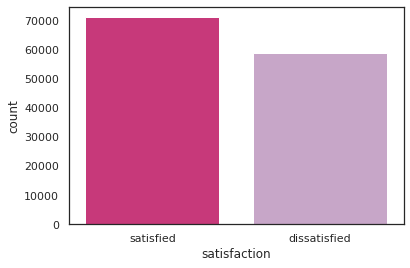

In [ ]:
print(df['satisfaction'].value_counts()) #Check if the data is imbalanced 
sns.set_theme(style="white")
sns.countplot(x=df["satisfaction"], palette = "PuRd_r"); #after the split do the oversampling and it is not that important because the imbalance is not that severe

## Data Preparation

####Data Cleaning

In [ ]:
print(df.isnull().values.any())   #Check if there are null values
df.isnull().sum() 

True


satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
df = df.dropna()   #remove the null values

In [ ]:
print(df['satisfaction'].value_counts())

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64


In [ ]:
df.shape

(129487, 23)

In [ ]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
df.duplicated().sum() #to check for duplicates

0

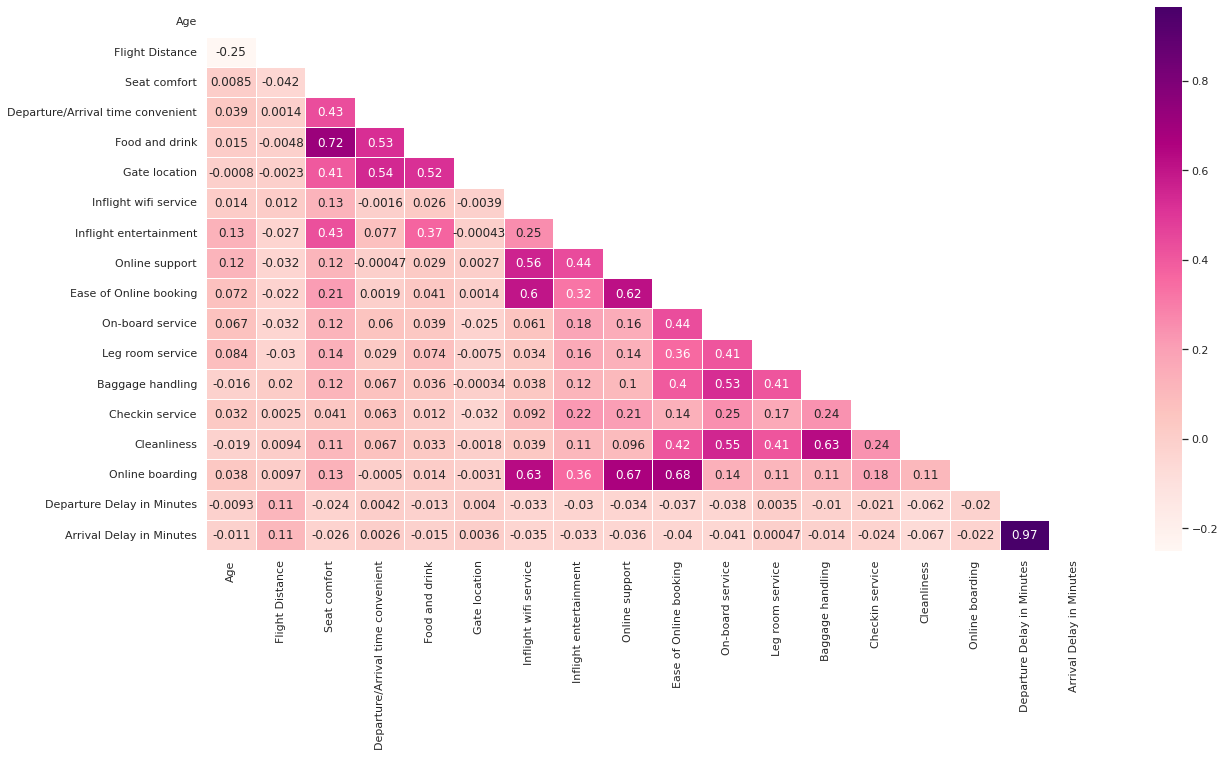

In [ ]:
 #To check for correlation among the variables 
corrmat = df.corr()   #There is a correlation between arrival delay in minutes and departure delay in minutes 
                      # One of them should be dropped
f, ax = plt.subplots(figsize =(20, 10))
sns.heatmap(corrmat, ax = ax, mask=np.triu(np.ones_like(corrmat, dtype=np.bool)), annot=True, annot_kws={"size": 12}, linewidths = 0.1, cmap='RdPu', fmt = '0.2' );



In [ ]:
df = df.drop("Departure Delay in Minutes",axis=1) #dropped the coloumn (axis=1 to drop the column due to correlation)

In [ ]:
df.to_csv('data-clean.csv', index=False) # exporting the clean data for visualizations

In [ ]:
# checking if dataset is imbalanced (after cleaning)
satisfied = Counter(df['satisfaction'])['satisfied']
dissatisfied = Counter(df['satisfaction'])['dissatisfied']
total = df.shape[0]
print('Total: {}\n  Satisfied: {} ({:.2f}% of total)\n  Dissatisfied: {} ({:.2f}% of total)'.format(total, satisfied, 100*satisfied/total, dissatisfied, 100*dissatisfied/total))

Total: 129487
  Satisfied: 70882 (54.74% of total)
  Dissatisfied: 58605 (45.26% of total)


#### Data Preprocessing

> One hot encoding

In [ ]:
def dummy(df, cols_list):   # to hot encode the variables is to change them into dummy variables only 0 and 1
    for col in cols_list:   # the baseline and the original column was dropped from the dataframe (the one with more than two categories)
        x = pd.get_dummies(df[col], drop_first=True)
        df.drop( [col], axis=1, inplace= True)
        df = pd.concat( [df, x], axis = 1)
    return df

to_be_dummy =  ['satisfaction', 'Gender','Customer Type', 'Type of Travel', 'Class']
df = dummy(df, to_be_dummy)

In [ ]:
df.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Arrival Delay in Minutes', 'satisfied', 'Male', 'disloyal Customer',
       'Personal Travel', 'Eco', 'Eco Plus'],
      dtype='object')

> Data Splitting

In [ ]:
X = df.drop('satisfied', axis=1) #splitting the data into x and y
y = df['satisfied'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify = y, random_state=0) #splitting the data
print(X_train.shape)
print(X_test.shape)

(103589, 22)
(25898, 22)


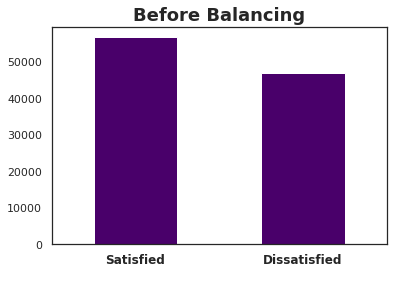

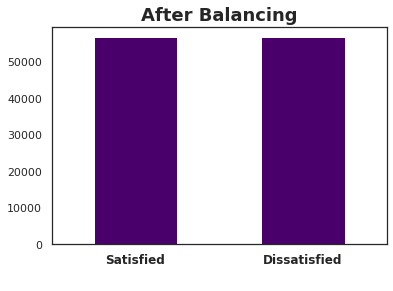




Total: 113410
  Satisfied: 56705 (50.00% of total)
  Dissatisfied: 56705 (50.00% of total)


In [ ]:
ax = plt.axes()
pd.DataFrame(y_train).value_counts().plot(kind='bar', cmap='RdPu_r')
plt.title('Before Balancing', fontsize=18, weight="bold")
plt.xlabel(' ')
# plt.ylabel('amount per label')
ax.set_xticklabels(['Satisfied', 'Dissatisfied'], rotation=0, size=12, weight="bold")
plt.show()
print('\n\n\n')

ros = RandomOverSampler(random_state=96)
X_train, y_train = ros.fit_resample(X_train, y_train)

ax = plt.axes()
pd.DataFrame(y_train).value_counts().plot(kind='bar', cmap="RdPu_r")
plt.title('After Balancing', fontsize=18, weight="bold")
plt.xlabel(' ')
# plt.ylabel('amount per label')
ax.set_xticklabels(['Satisfied', 'Dissatisfied'], rotation=0, size=12, weight="bold")
plt.show()


satisfied = pd.DataFrame(y_train).value_counts().values[0]
not_satisfied = pd.DataFrame(y_train).value_counts().values[1]
total = satisfied + not_satisfied 
print('\n\n\nTotal: {}\n  Satisfied: {} ({:.2f}% of total)\n  Dissatisfied: {} ({:.2f}% of total)'\
      .format(total, satisfied, 100*satisfied/total, not_satisfied, 100*not_satisfied/total))

In [ ]:
rfe = RFE(GradientBoostingClassifier(random_state = 0, subsample=0.7, learning_rate=0.2,n_estimators=3), n_features_to_select=1)
rfe.fit(X_train, y_train) 

RFE(estimator=GradientBoostingClassifier(learning_rate=0.2, n_estimators=3,
                                         random_state=0, subsample=0.7),
    n_features_to_select=1)

In [ ]:
features = X_train.columns.to_list()
sorted(zip(rfe.ranking_ , features))

print("Sorted List of features according to their importance:\n")
for rank, feature in sorted(zip(rfe.ranking_ , features)):
  print(rank, " ", feature, "\n")

Sorted List of features according to their importance:

1   Inflight entertainment 

2   Seat comfort 

3   Ease of Online booking 

4   Online support 

5   Checkin service 

6   disloyal Customer 

7   Eco 

8   Personal Travel 

9   Male 

10   Arrival Delay in Minutes 

11   Online boarding 

12   Cleanliness 

13   Inflight wifi service 

14   Gate location 

15   Food and drink 

16   Departure/Arrival time convenient 

17   Eco Plus 

18   On-board service 

19   Baggage handling 

20   Leg room service 

21   Flight Distance 

22   Age 



In [ ]:
from sklearn.feature_selection import SelectKBest, chi2 #Feature importance using the chi square
X = df.loc[:,df.columns!='satisfied'].round(3) 
y = df[['satisfied']] 
selector = SelectKBest(chi2, k=10) 
selector.fit(X, y) 
X_new = selector.transform(X) 
print(X.columns[selector.get_support(indices=True)])

Index(['Age', 'Flight Distance', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Online boarding', 'Arrival Delay in Minutes', 'disloyal Customer'],
      dtype='object')


In [ ]:
scaler = preprocessing.StandardScaler()    #Feature Scaling
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

### Models and Evaluation

####AdaBoost Model

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_ada,labels=ada.classes_))
print(f"f1 Score = {round(f1_score(y_test, y_pred_ada, average='weighted'), 5)}")

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11721
           1       0.92      0.89      0.91     14177

    accuracy                           0.90     25898
   macro avg       0.90      0.90      0.90     25898
weighted avg       0.90      0.90      0.90     25898

f1 Score = 0.89969


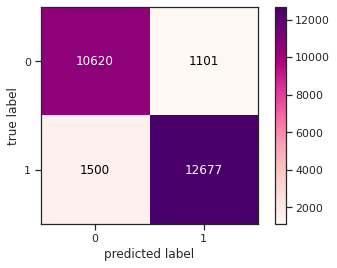

In [ ]:
cm = confusion_matrix(y_test, y_pred_ada)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar= True, cmap="RdPu")
plt.show()

####Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression(random_state=0)
lrg.fit(X_train, y_train)
y_pred_lrg = lrg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_lrg,labels=lrg.classes_))
print(f"f1 Score = {round(f1_score(y_test, y_pred_lrg, average='weighted'), 5)}")

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     11721
           1       0.86      0.83      0.85     14177

    accuracy                           0.84     25898
   macro avg       0.83      0.84      0.84     25898
weighted avg       0.84      0.84      0.84     25898

f1 Score = 0.83626


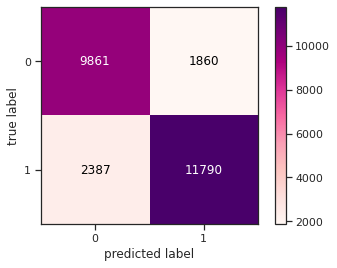

In [ ]:
cm = confusion_matrix(y_test, y_pred_lrg)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar= True, cmap="RdPu")
plt.show()

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=0, probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svc,labels=svc.classes_))
print(f"f1 Score = {round(f1_score(y_test, y_pred_svc, average='weighted'), 5)}")

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11721
           1       0.96      0.94      0.95     14177

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

f1 Score = 0.94857


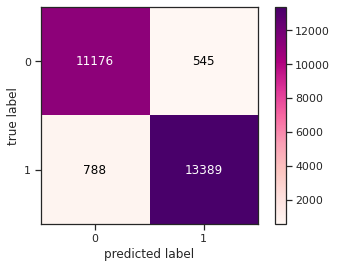

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar= True, cmap="RdPu")
plt.show()

####Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

param_grid = {'bootstrap': [True],
              'max_depth': [60, 80, 100],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 500, 1000]}

gcv_rfc = GridSearchCV(rfc, param_grid, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train);
print(f'GridSearchView Best Params: {gcv_rfc.best_params_}\n\n\n')

## Optimized Predictions
y_pred_rfc = gcv_rfc.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchView Best Params: {'bootstrap': True, 'max_depth': 60, 'min_samples_split': 8, 'n_estimators': 1000}





In [ ]:
print(classification_report(y_test,y_pred_rfc,labels=gcv_rfc.classes_))
print(f"f1 Score = {round(f1_score(y_test, y_pred_rfc, average='weighted'), 5)}")

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11721
           1       0.97      0.95      0.96     14177

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

f1 Score = 0.95787


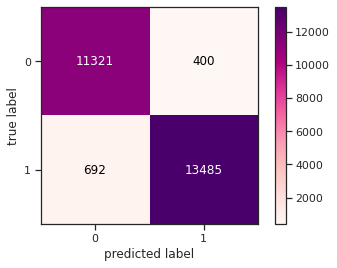

In [ ]:
cm = confusion_matrix(y_test, y_pred_rfc)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar= True,  cmap="RdPu")
plt.show()

####XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=0)
xgbc.fit(X_train, y_train)
y_pred_xgbc= xgbc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_xgbc,labels=xgbc.classes_))
print(f"f1 Score = {round(f1_score(y_test, y_pred_xgbc, average='weighted'), 5)}")

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11721
           1       0.94      0.91      0.93     14177

    accuracy                           0.92     25898
   macro avg       0.92      0.92      0.92     25898
weighted avg       0.92      0.92      0.92     25898

f1 Score = 0.91966


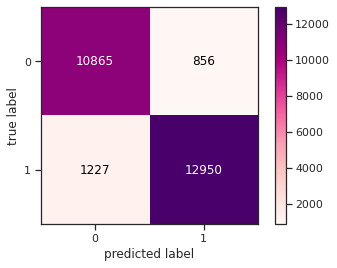

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgbc)
fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar = True, cmap="RdPu")
plt.show()

> DOC Curve

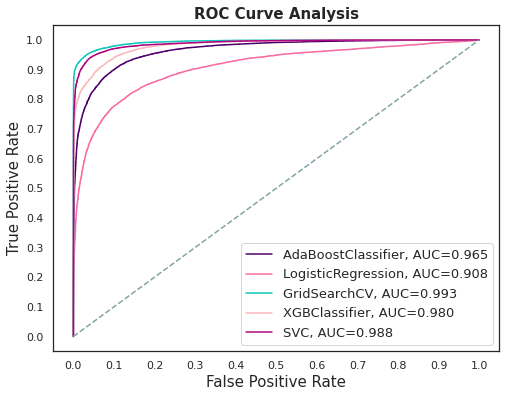

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [ada, lrg, gcv_rfc, xgbc, svc]
colours = ['#4e006b','#f76ca3' , '#0ec8bc', '#fbb8bc', '#b0037f']

# Define a result table as a DataFrame
result = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc']) #will produce four columns

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result = result.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    """result = result.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
"""

# Set name of the classifiers as index labels
result.set_index('classifiers', inplace=True) #made the classifiers column an index

fig = plt.figure(figsize=(8,6))
for i, colour in zip(result.index, colours):
    plt.plot(result.loc[i]['fpr'], 
             result.loc[i]['tpr'],
             color=colour, 
             label="{}, AUC={:.3f}".format(i, result.loc[i]['auc']))
    

#plt.plot([0,1], [0,1], color='#089fc8', linestyle='--')
plt.plot([0,1], [0,1], color='#82a3a5', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()